In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the radius of the wheel, and the initial angular position.
r = 1.0
theta_i = 0.0

# Define some variables to allow easy conversion from degrees <-> radians
deg_to_rad = np.pi/180.0
rad_to_deg = 180.0/np.pi

# Define the initial angle in radians!
theta_i_rad = theta_i*deg_to_rad

# Set the initial angular velocity, the angular acceleration, and the total time.
omega_i = 1.6
alpha = 0.0
t_max = 10.0

In [3]:
# Define a function that will calculate the angular position and velocity at
# a particular time.

def get_theta(t):
    omega_f = omega_i + alpha*t
    theta = theta_i_rad + omega_i*t + 0.5*alpha*t**2
    return theta, omega_f

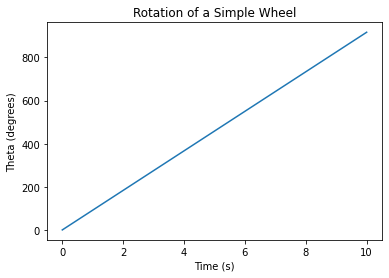

In [4]:
# Set the total number of time steps for the simulation
nsteps = 20001
debug = False


# Define some arrays to hold the angular position, velocity, and elapsed time.
theta = np.zeros(nsteps)
omega = np.zeros(nsteps)
t = np.zeros(nsteps)


# Loop over each time step, and calculate the angular position and angular velocity.
for i in range(0,nsteps):
    dt = t_max/(nsteps-1)
    t[i] = i*dt
    theta[i], omega[i] = get_theta(t[i])
    theta[i] = theta[i]*rad_to_deg

# Plot the angular position as a function of time.
plt.plot(t,theta)
plt.xlabel('Time (s)')
plt.ylabel('Theta (degrees)')
plt.title('Rotation of a Simple Wheel')
plt.show()

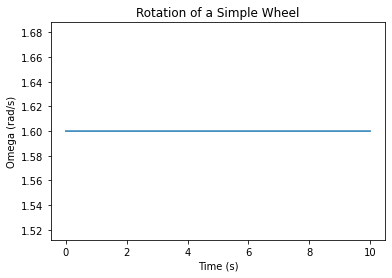

In [5]:
# Plot the angular velocity as a function of time.
plt.plot(t,omega)
plt.xlabel('Time (s)')
plt.ylabel('Omega (rad/s)')
plt.title('Rotation of a Simple Wheel')
plt.show()

In [6]:
# Set the number of frames per second, and the total number of frames, for the animation.
FPS = 60
framesNum = 200

In [7]:
# Create an animation of the system
from matplotlib import animation
from matplotlib.patches import Ellipse
from IPython.display import HTML
from matplotlib import patches
from matplotlib.collections import PatchCollection

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
ax.axis('on')

#fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
#plt.plot(xpos,ypos)

plt.xlabel('')
plt.ylabel('')
plt.title('Rotation of a Simple Wheel')

#plt.show()

line1, = ax.plot([], [], 'b-', lw=2)

wheel = Ellipse((0, 0),2.0,2.0,facecolor = 'red',fill=False)

# Define the different elements in the animation
def init():
    line1.set_data([], [])
    ax.add_patch(wheel)
    return line1, wheel

# Animation function. This is called sequentially.
def animate(j):
    i = (j+1)*int((nsteps-1)/framesNum)
    
    thisx = [0, r*np.cos(theta[i]*deg_to_rad)]
    thisy = [0, r*np.sin(theta[i]*deg_to_rad)]
    line1.set_data(thisx, thisy)
    
    wheel.center = (0, 0)
    
    return line1, wheel

# Create animation

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=framesNum, interval=1200/FPS, repeat=False)
plt.close(anim._fig)

# Display the animation
HTML(anim.to_html5_video())

In [8]:
print (theta[20000])

916.7324722093172
